In [1]:
from data.pemrosesanData import ambilData, infoKolom, labelEncode, MinMax, mappingFitur, cetak_kolom_kategorikal
from algoritma.KNN import K, splitDataset, Prediksi, Jarak, jarakTerdekat, hasilJarakTerdekat, acakK, trainLabel, Klasifikasi, semuaPrediksi, Feature
from algoritma.KFold import Split, SplitFold, PrintFold, DataTrainig
from pengujian.metrik_evaluasi import Akurasi, Presisi, Recall, F1, CM, nilaiCM, Metrik, visualisaiMetrik, maksMetrik, visualisasiCMklasifikasi, visualisasiCM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
dataset = ambilData() 

In [3]:
# menampilkan dataset
print ("\t\tHasil Import Dataset") 
print (dataset)

		Hasil Import Dataset
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0   

In [4]:
#informasi kolom dataset
print("\t\tInformasi Kolom dataset")
dataset.info()

		Informasi Kolom dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# menampilkan informasi kolom kategorikal (object)
print("\t\tInformasi Kolom kategorikal")
cetak_kolom_kategorikal(dataset)

		Informasi Kolom kategorikal
Kolom : Sex
		 M 	:  725  data
		 F 	:  193  data
	 2  Nilai
Kolom : ChestPainType
		 ASY 	:  496  data
		 NAP 	:  203  data
		 ATA 	:  173  data
		 TA 	:  46  data
	 4  Nilai
Kolom : RestingECG
		 Normal 	:  552  data
		 LVH 	:  188  data
		 ST 	:  178  data
	 3  Nilai
Kolom : ExerciseAngina
		 N 	:  547  data
		 Y 	:  371  data
	 2  Nilai
Kolom : ST_Slope
		 Flat 	:  460  data
		 Up 	:  395  data
		 Down 	:  63  data
	 3  Nilai


In [6]:
# encoding nilai kategorikal menjadi numerikal
dataset = labelEncode(dataset)

In [7]:
# menampilkan dataset yang telah diencoding
print ("\t\tDataset Yang Telah Diencoding")
print (dataset)


		Dataset Yang Telah Diencoding
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  Exercis

In [8]:
# Normalisasi dataset
dataset = MinMax(dataset)

In [9]:
# menampilkan dataset yang telah dinormalisasi
print ("\t\tDataset Yang Telah dinormalisasi")
print (dataset)

		Dataset Yang Telah dinormalisasi
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69         0.29        0.0         0.5   

    

In [10]:
#variabel fold
n_split = 9
fold = []

In [11]:
#split datafold
fold = SplitFold(dataset, n_split)

In [13]:
#inisialisasi 6 K berbeda
k = [3,5,7,9,11,13]
#mencari nilai terbesar dari k
maks_K = np.max(k)

In [14]:
#inisiasi variabel untuk menyimpan nilai metrik
avg_akurasi = avg_presisi = avg_recall = avg_f1 = 0
metrik = 0
k_total = 0

Data training ke-0:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
102  0.24  0.0           0.00       0.75         0.65        0.0         0.5   
103  0.24  1.0           0.00       0.60         0.77        1.0         0.5   
104  0.37  1.0           0.00       0.59         0.31        0.0         0.5   
105  0.59  1.0           0.33       0.70         0.43        1.0         0.5   
106  0.41  0.0           0.00       0.60         0.42        0.0         1.0   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69         0.29        0.0         0.5   

     MaxHR  Exercis

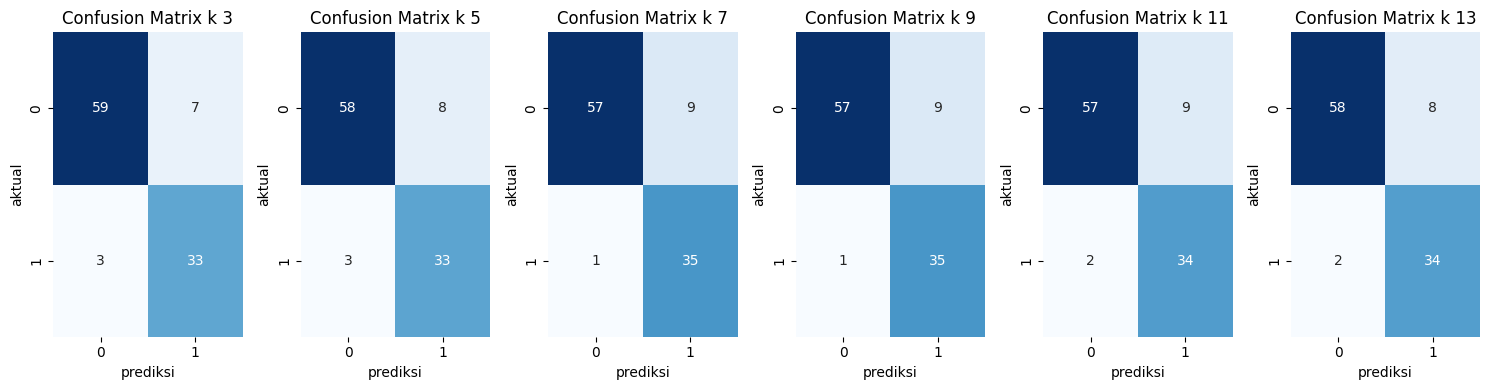


Nilai klasifikasi fold 0 berdasarkan matriks konfusi
    k  TN  FP  FN  TP   T   F
0   3  59   7   3  33  92  10
1   5  58   8   3  33  91  11
2   7  57   9   1  35  92  10
3   9  57   9   1  35  92  10
4  11  57   9   2  34  91  11
5  13  58   8   2  34  92  10
metrik evaluasi data fold 0
    k  akurasi  presisi  recall    f1
0   3     0.90     0.82    0.92  0.87
1   5     0.89     0.80    0.92  0.86
2   7     0.90     0.80    0.97  0.88
3   9     0.90     0.80    0.97  0.88
4  11     0.89     0.79    0.94  0.86
5  13     0.90     0.81    0.94  0.87


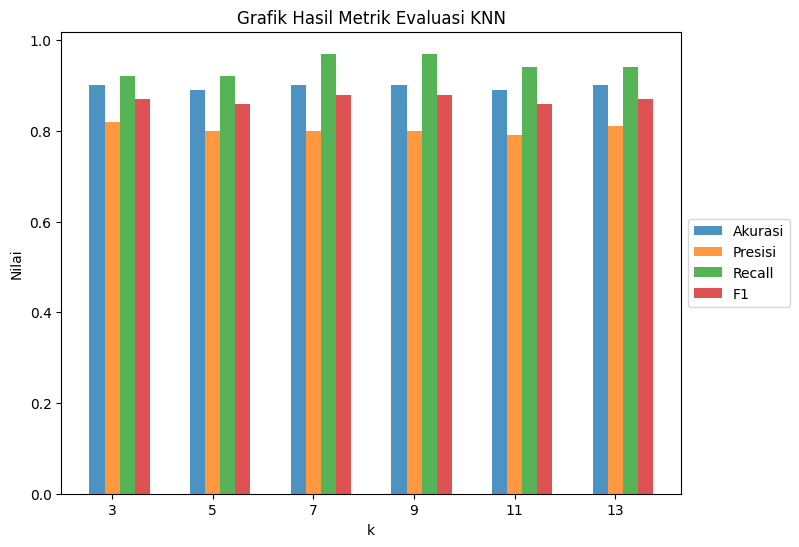

Data training ke-1:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69         0.29        0.0         0.5   

     MaxHR  Exercis

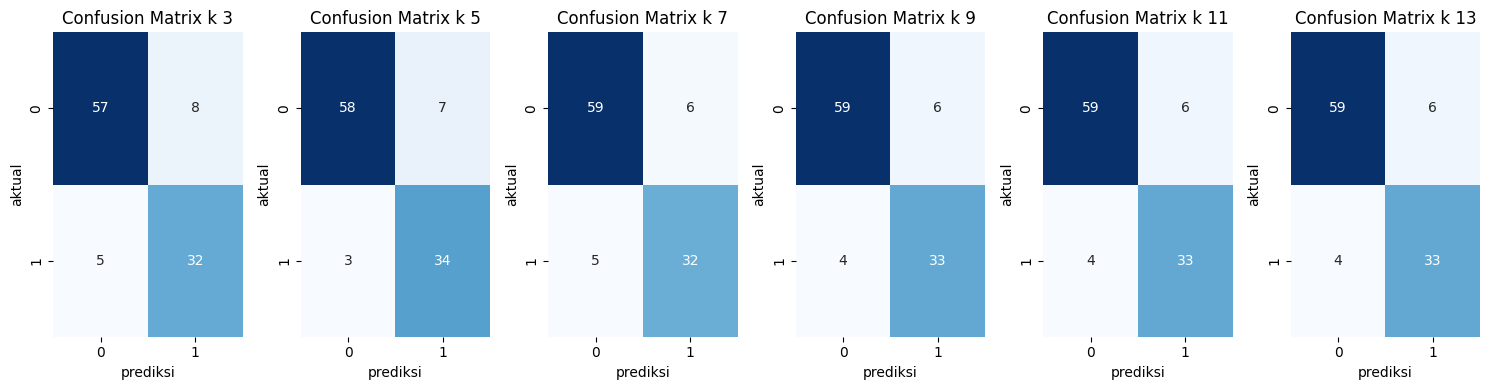


Nilai klasifikasi fold 1 berdasarkan matriks konfusi
    k  TN  FP  FN  TP   T   F
0   3  57   8   5  32  89  13
1   5  58   7   3  34  92  10
2   7  59   6   5  32  91  11
3   9  59   6   4  33  92  10
4  11  59   6   4  33  92  10
5  13  59   6   4  33  92  10
metrik evaluasi data fold 1
    k  akurasi  presisi  recall    f1
0   3     0.87     0.80    0.86  0.83
1   5     0.90     0.83    0.92  0.87
2   7     0.89     0.84    0.86  0.85
3   9     0.90     0.85    0.89  0.87
4  11     0.90     0.85    0.89  0.87
5  13     0.90     0.85    0.89  0.87


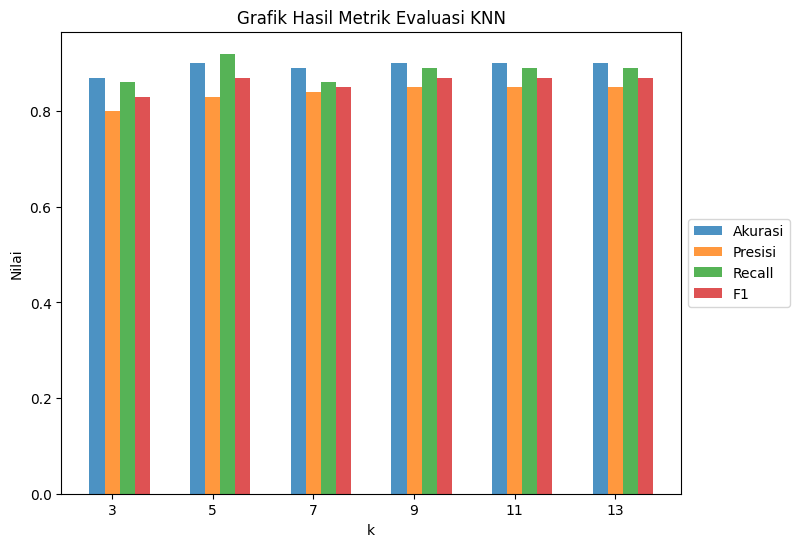

Data training ke-2:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69         0.29        0.0         0.5   

     MaxHR  Exercis

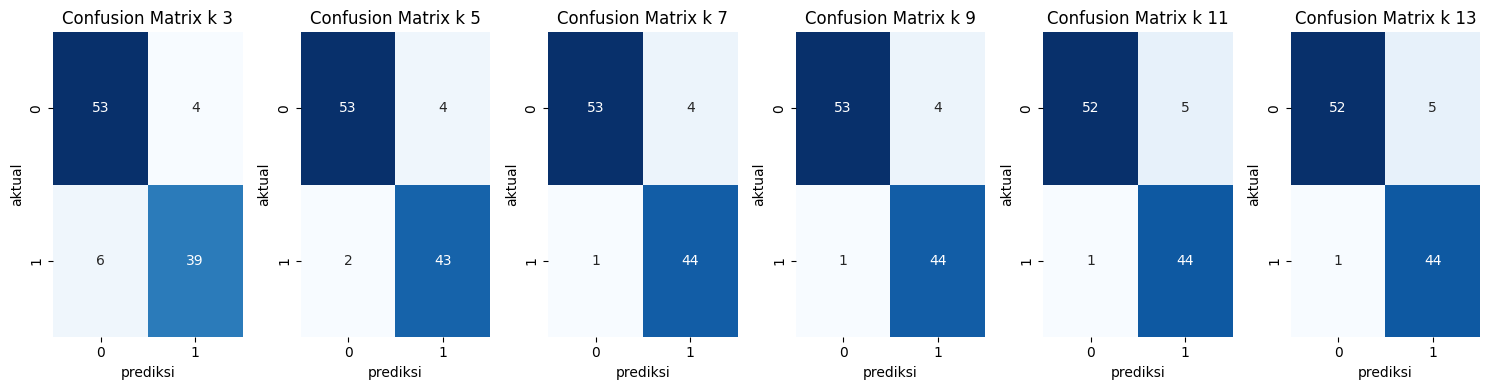


Nilai klasifikasi fold 2 berdasarkan matriks konfusi
    k  TN  FP  FN  TP   T   F
0   3  53   4   6  39  92  10
1   5  53   4   2  43  96   6
2   7  53   4   1  44  97   5
3   9  53   4   1  44  97   5
4  11  52   5   1  44  96   6
5  13  52   5   1  44  96   6
metrik evaluasi data fold 2
    k  akurasi  presisi  recall    f1
0   3     0.90     0.91    0.87  0.89
1   5     0.94     0.91    0.96  0.93
2   7     0.95     0.92    0.98  0.95
3   9     0.95     0.92    0.98  0.95
4  11     0.94     0.90    0.98  0.94
5  13     0.94     0.90    0.98  0.94


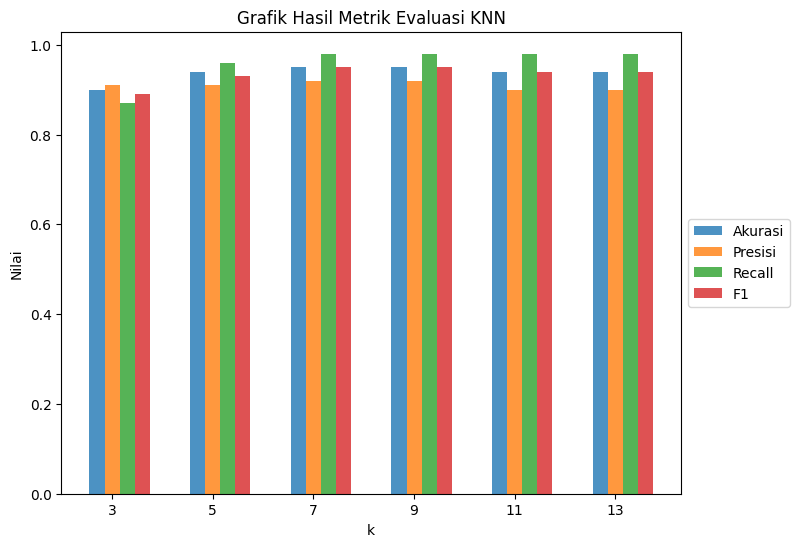

Data training ke-3:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69         0.29        0.0         0.5   

     MaxHR  Exercis

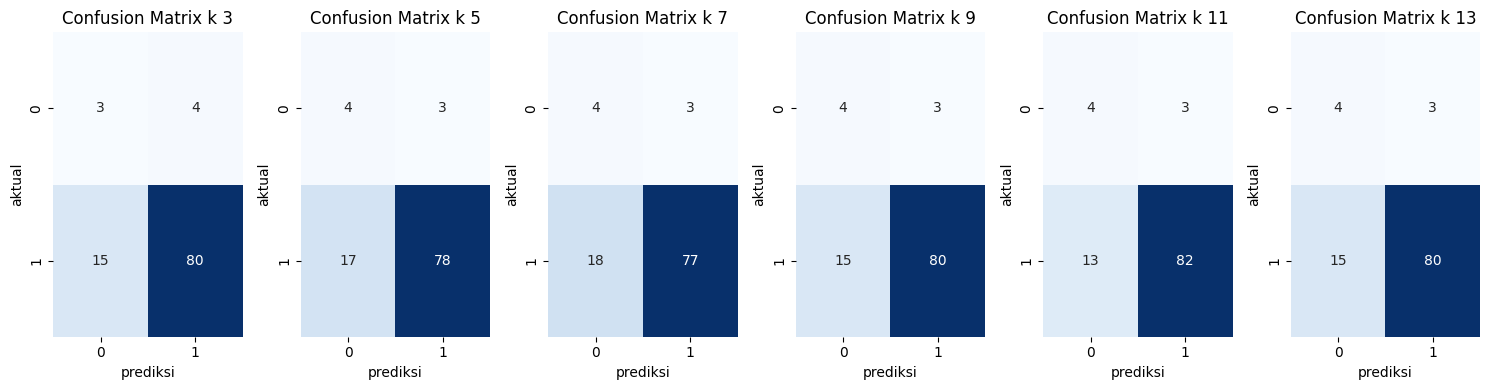


Nilai klasifikasi fold 3 berdasarkan matriks konfusi
    k  TN  FP  FN  TP   T   F
0   3   3   4  15  80  83  19
1   5   4   3  17  78  82  20
2   7   4   3  18  77  81  21
3   9   4   3  15  80  84  18
4  11   4   3  13  82  86  16
5  13   4   3  15  80  84  18
metrik evaluasi data fold 3
    k  akurasi  presisi  recall    f1
0   3     0.81     0.95    0.84  0.89
1   5     0.80     0.96    0.82  0.89
2   7     0.79     0.96    0.81  0.88
3   9     0.82     0.96    0.84  0.90
4  11     0.84     0.96    0.86  0.91
5  13     0.82     0.96    0.84  0.90


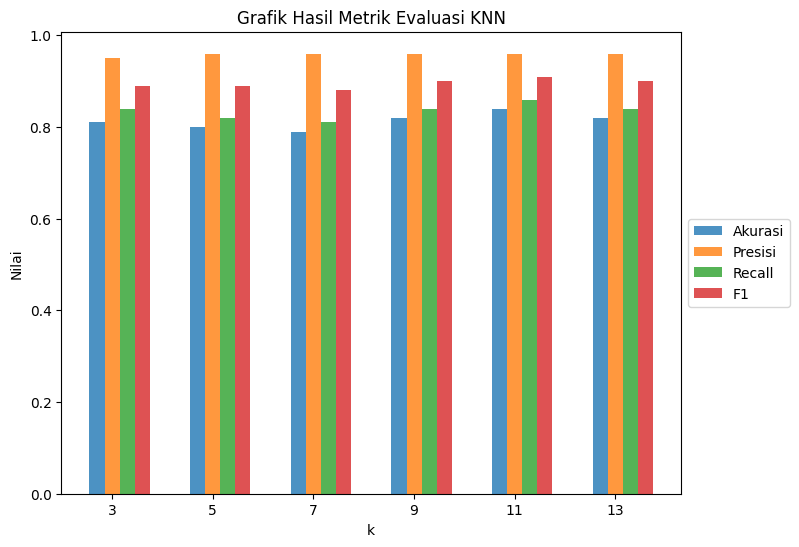

Data training ke-4:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69         0.29        0.0         0.5   

     MaxHR  Exercis

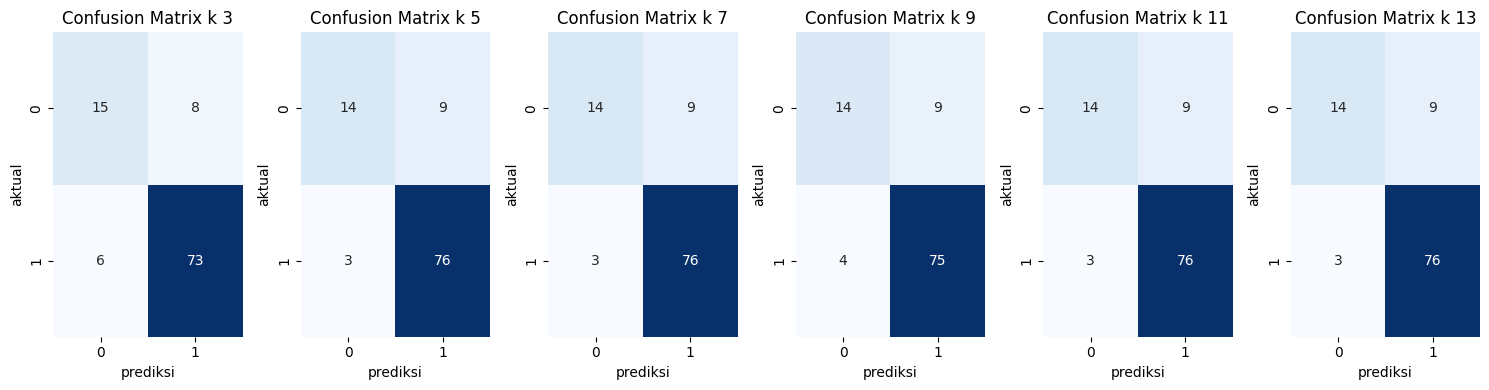


Nilai klasifikasi fold 4 berdasarkan matriks konfusi
    k  TN  FP  FN  TP   T   F
0   3  15   8   6  73  88  14
1   5  14   9   3  76  90  12
2   7  14   9   3  76  90  12
3   9  14   9   4  75  89  13
4  11  14   9   3  76  90  12
5  13  14   9   3  76  90  12
metrik evaluasi data fold 4
    k  akurasi  presisi  recall    f1
0   3     0.86     0.90    0.92  0.91
1   5     0.88     0.89    0.96  0.93
2   7     0.88     0.89    0.96  0.93
3   9     0.87     0.89    0.95  0.92
4  11     0.88     0.89    0.96  0.93
5  13     0.88     0.89    0.96  0.93


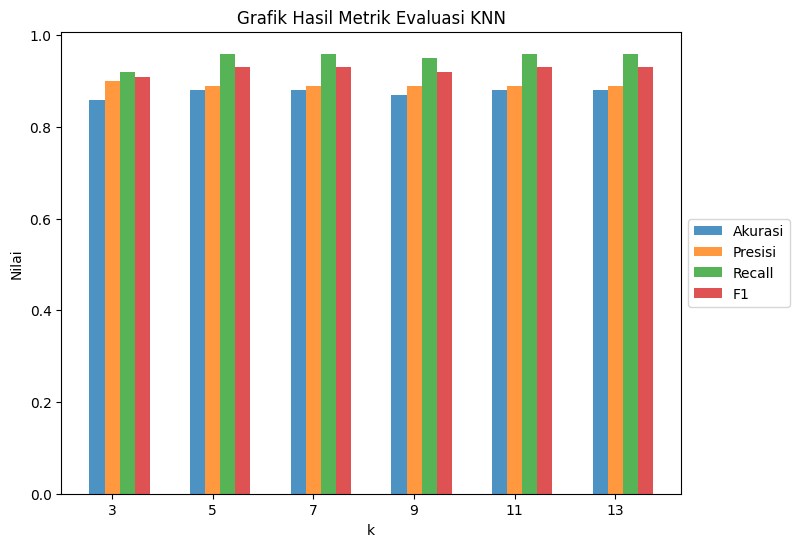

Data training ke-5:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69         0.29        0.0         0.5   

     MaxHR  Exercis

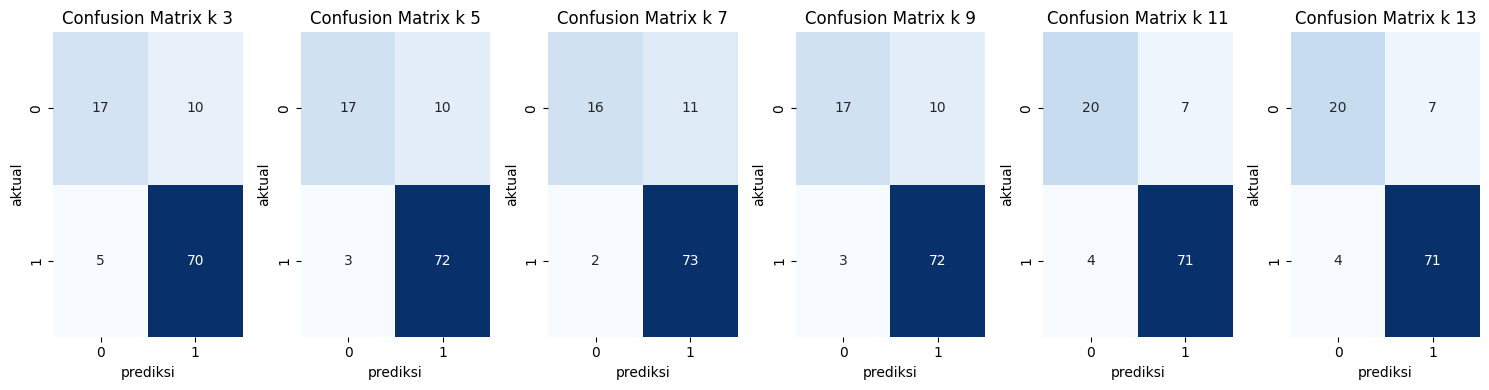


Nilai klasifikasi fold 5 berdasarkan matriks konfusi
    k  TN  FP  FN  TP   T   F
0   3  17  10   5  70  87  15
1   5  17  10   3  72  89  13
2   7  16  11   2  73  89  13
3   9  17  10   3  72  89  13
4  11  20   7   4  71  91  11
5  13  20   7   4  71  91  11
metrik evaluasi data fold 5
    k  akurasi  presisi  recall    f1
0   3     0.85     0.88    0.93  0.90
1   5     0.87     0.88    0.96  0.92
2   7     0.87     0.87    0.97  0.92
3   9     0.87     0.88    0.96  0.92
4  11     0.89     0.91    0.95  0.93
5  13     0.89     0.91    0.95  0.93


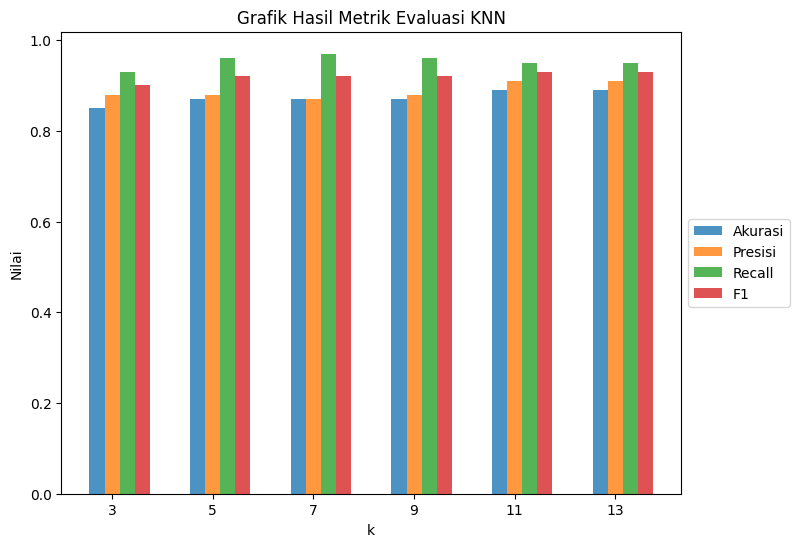

Data training ke-6:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69         0.29        0.0         0.5   

     MaxHR  Exercis

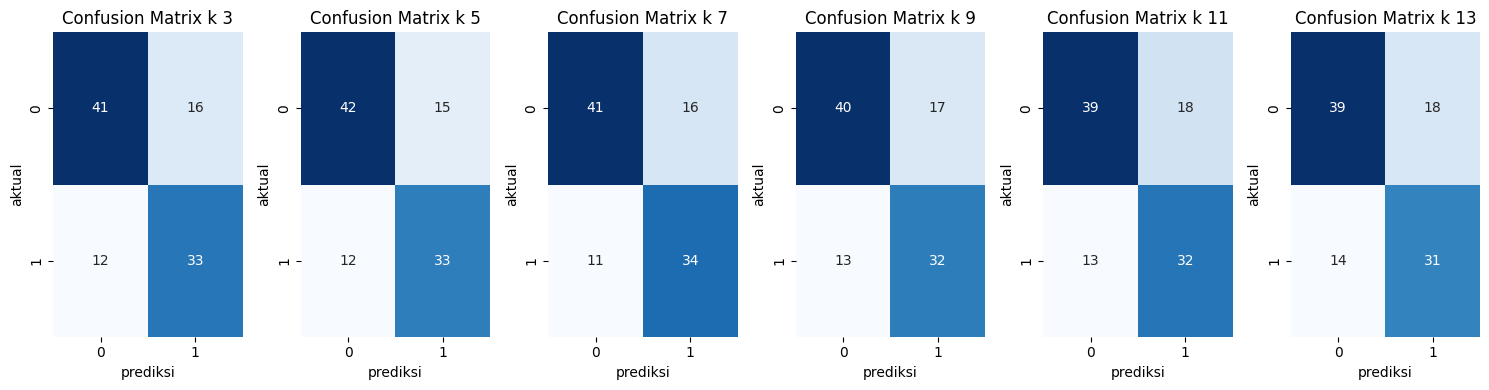


Nilai klasifikasi fold 6 berdasarkan matriks konfusi
    k  TN  FP  FN  TP   T   F
0   3  41  16  12  33  74  28
1   5  42  15  12  33  75  27
2   7  41  16  11  34  75  27
3   9  40  17  13  32  72  30
4  11  39  18  13  32  71  31
5  13  39  18  14  31  70  32
metrik evaluasi data fold 6
    k  akurasi  presisi  recall    f1
0   3     0.73     0.67    0.73  0.70
1   5     0.74     0.69    0.73  0.71
2   7     0.74     0.68    0.76  0.72
3   9     0.71     0.65    0.71  0.68
4  11     0.70     0.64    0.71  0.67
5  13     0.69     0.63    0.69  0.66


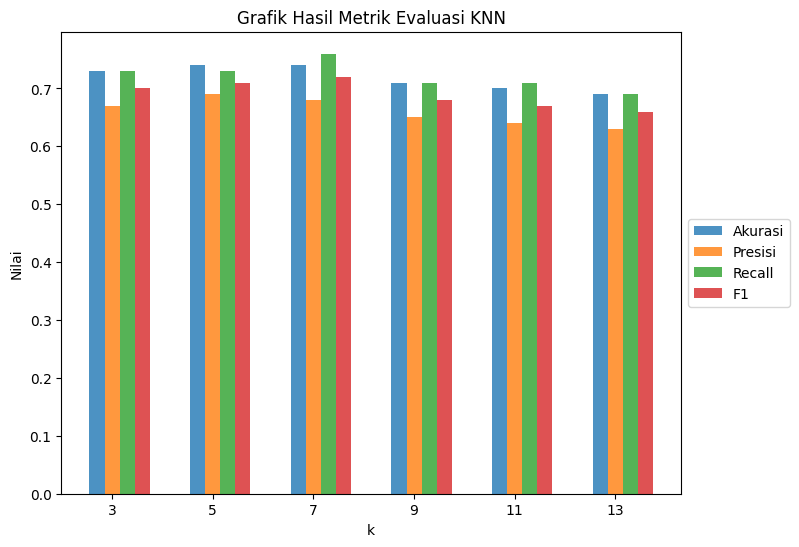

Data training ke-7:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69         0.29        0.0         0.5   

     MaxHR  Exercis

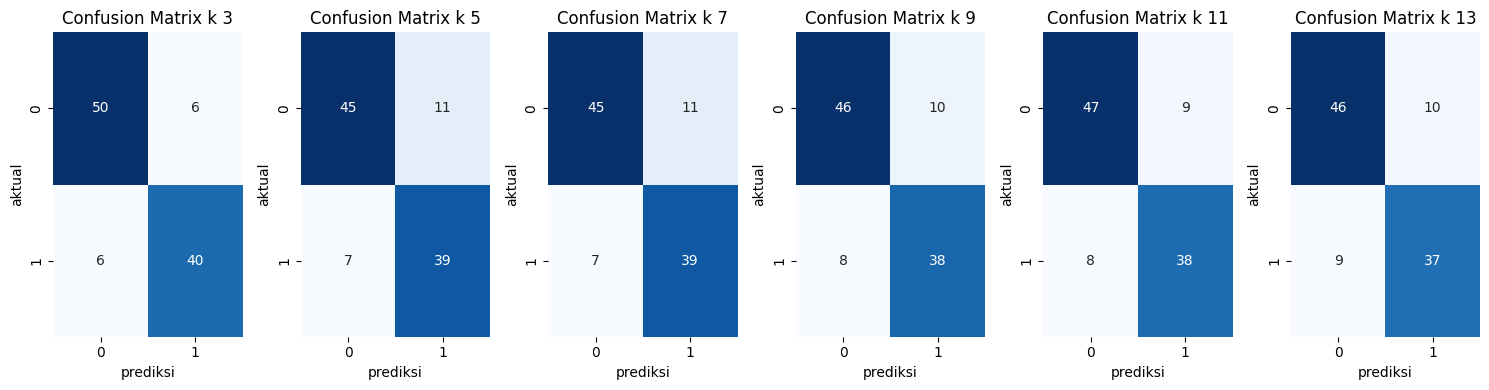


Nilai klasifikasi fold 7 berdasarkan matriks konfusi
    k  TN  FP  FN  TP   T   F
0   3  50   6   6  40  90  12
1   5  45  11   7  39  84  18
2   7  45  11   7  39  84  18
3   9  46  10   8  38  84  18
4  11  47   9   8  38  85  17
5  13  46  10   9  37  83  19
metrik evaluasi data fold 7
    k  akurasi  presisi  recall    f1
0   3     0.88     0.87    0.87  0.87
1   5     0.82     0.78    0.85  0.81
2   7     0.82     0.78    0.85  0.81
3   9     0.82     0.79    0.83  0.81
4  11     0.83     0.81    0.83  0.82
5  13     0.81     0.79    0.80  0.80


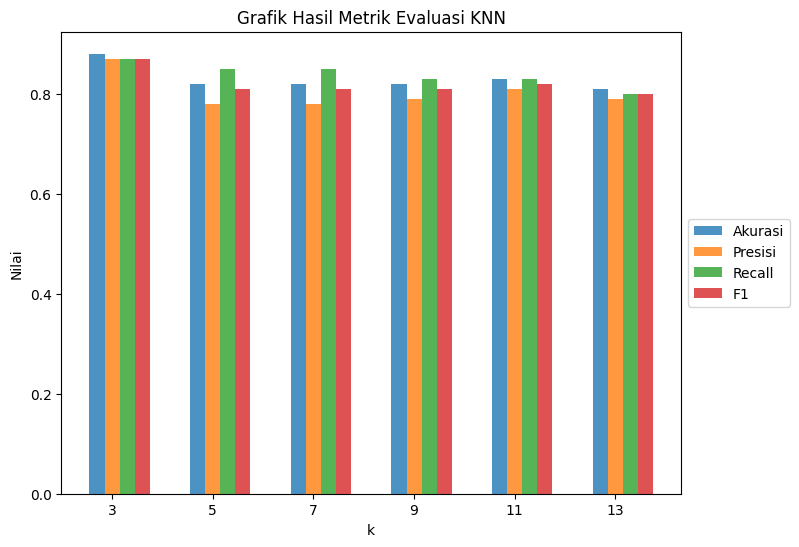

Data training ke-8:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
811  0.61  0.0           0.00       0.50         0.41        0.0         0.0   
812  0.53  0.0           0.67       0.55         0.35        0.0         0.5   
813  0.84  0.0           1.00       0.70         0.40        0.0         0.5   
814  1.00  1.0           0.00       0.62         0.50        0.0         0.0   
815  0.82  1.0           0.67       0.59         0.46        0.0         0.5   

     MaxHR  Exercis

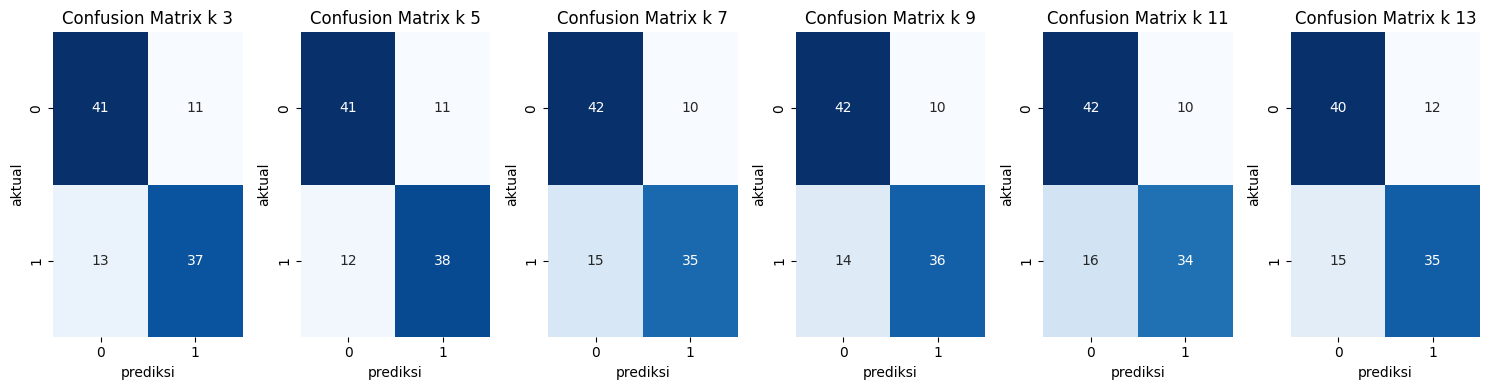


Nilai klasifikasi fold 8 berdasarkan matriks konfusi
    k  TN  FP  FN  TP   T   F
0   3  41  11  13  37  78  24
1   5  41  11  12  38  79  23
2   7  42  10  15  35  77  25
3   9  42  10  14  36  78  24
4  11  42  10  16  34  76  26
5  13  40  12  15  35  75  27
metrik evaluasi data fold 8
    k  akurasi  presisi  recall    f1
0   3     0.76     0.77    0.74  0.76
1   5     0.77     0.78    0.76  0.77
2   7     0.75     0.78    0.70  0.74
3   9     0.76     0.78    0.72  0.75
4  11     0.75     0.77    0.68  0.72
5  13     0.74     0.74    0.70  0.72


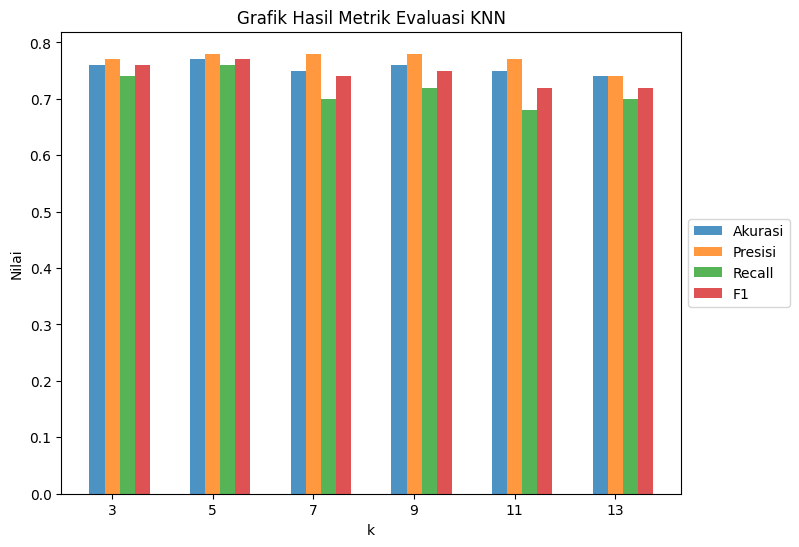

In [15]:
#algoritma KNN
for i in range(len(fold)):
    #data training
    print(f"Data training ke-{i}:")
    data_training = DataTrainig(fold[i], dataset)
    print(data_training)

    #data testing
    print(f"Data testing ke-{i}:")
    data_testing = fold[i]
    print(data_testing)

    #Split fitur dataset
    X_train, X_test, y_train, y_test = Feature(data_training, data_testing)
        
    #mencari jarak terdekat
    terdekat, indeks = jarakTerdekat(X_test, X_train, y_train, maks_K)
    # Melakukan klasifikasi menggunakan kNN untuk setiap nilai k
    y_pred = semuaPrediksi(k, X_train, y_train, X_test)
    # mencari jarak terdekat
    hasil_jarak_terdekat = hasilJarakTerdekat(X_test, y_train, terdekat, indeks)    
    #konversi data frame
    hasil_jarak_terdekat = pd.DataFrame(hasil_jarak_terdekat, columns=["Testing", "Training", "Jarak", "Kelas"])
    print(hasil_jarak_terdekat)

    #klasifikasi berdasarkan jarak terdekat
    kolom_prediksi = ["K" + str(val) for val in k] # Membuat dictionary kolom
    prediksi = pd.DataFrame(np.transpose(y_pred), columns=kolom_prediksi) # Membuat dataframe
    klasifikasi = Klasifikasi(X_test, prediksi, y_test) # Hasil klasifikasi
    print(klasifikasi)

    akurasi, presisi, recall, f1, cm = Metrik(y_test, prediksi)
    visualisasiCMklasifikasi(cm, k)

    TN, FP, FN, TP, T, F = nilaiCM(cm)

    nilai_cm = pd.DataFrame({'k': k, 'TN': TN, 'FP': FP, 'FN': FN, 'TP': TP, 'T': T, 'F': F})

    print(f"Nilai klasifikasi fold {i} berdasarkan matriks konfusi")
    print(nilai_cm)

    metrik_per_fold = pd.DataFrame({'k': k,'akurasi': akurasi, 'presisi': presisi, 'recall': recall, 'f1': f1})
    print(f"metrik evaluasi data fold {i}")
    print(metrik_per_fold)
    visualisaiMetrik(metrik_per_fold)
        
    if(i==0):
        metrik=metrik_per_fold
    else:
        metrik=pd.concat([metrik, metrik_per_fold], ignore_index=True)

rata-rata nilai metrik evaluasi
    k  akurasi  presisi  recall    f1
0   3     0.84     0.84    0.85  0.85
1   5     0.85     0.84    0.88  0.85
2   7     0.84     0.84    0.87  0.85
3   9     0.84     0.84    0.87  0.85
4  11     0.85     0.84    0.87  0.85
5  13     0.84     0.83    0.86  0.85


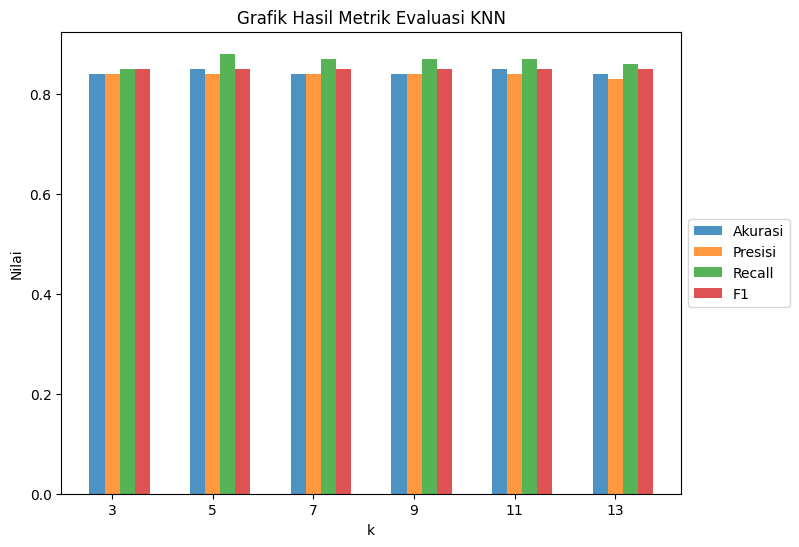

In [16]:
avg_akurasi = round(metrik.groupby('k')['akurasi'].mean(),2)
avg_akurasi = avg_akurasi.reset_index(drop=True)
avg_presisi = round(metrik.groupby('k')['presisi'].mean(),2)
avg_presisi = avg_presisi.reset_index(drop=True)
avg_recall = round(metrik.groupby('k')['recall'].mean(),2)
avg_recall = avg_recall.reset_index(drop=True)
avg_f1 = round(metrik.groupby('k')['f1'].mean(),2)
avg_f1 = avg_f1.reset_index(drop=True)
k=pd.DataFrame({'k':k})
avg_metrik =  pd.concat([k, avg_akurasi, avg_presisi, avg_recall, avg_f1], axis=1)
print("rata-rata nilai metrik evaluasi")
print(avg_metrik)
visualisaiMetrik(avg_metrik)